In [1]:
from dataset.nifti_dataset import NiftiDataset
import matplotlib.pyplot as plt
from torchvision import transforms
import torchio as tio
from torch.utils.data import DataLoader
from models.unet3d import UNet3D

In [2]:
source_image_dir = "/work/disa_lab/projects/tiny_brains/cc_motion_corrupted"
label_image_dir = "/work/disa_lab/projects/tiny_brains/unet_segmentation/unet_segmentation/Images"

In [3]:
import os

In [4]:
source_images = os.listdir(source_image_dir)
label_images = os.listdir(label_image_dir)

In [5]:
len(source_images), len(label_images)

(359, 359)

In [6]:
source_images = [os.path.join(source_image_dir, im_ref) for im_ref in source_images]
label_images = [os.path.join(label_image_dir, im_ref) for im_ref in label_images]

In [7]:
target_shape = (128, 128, 128)

transformations = transforms.Compose([
    transforms.ToTensor()
])

In [8]:
dataset = NiftiDataset(source_images, label_images, target_shape, transformations)

In [9]:
def show_image_and_mask(sample):
    image = sample[0][0].numpy() # Remove channel dimension
    mask = sample[1][0].numpy()    # Remove channel dimension

    # Display a slice from the middle of the 3D volume
    slice_index = image.shape[0] // 2

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image[slice_index], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(mask[slice_index], cmap='gray')
    ax[1].set_title('GT')
    plt.show()

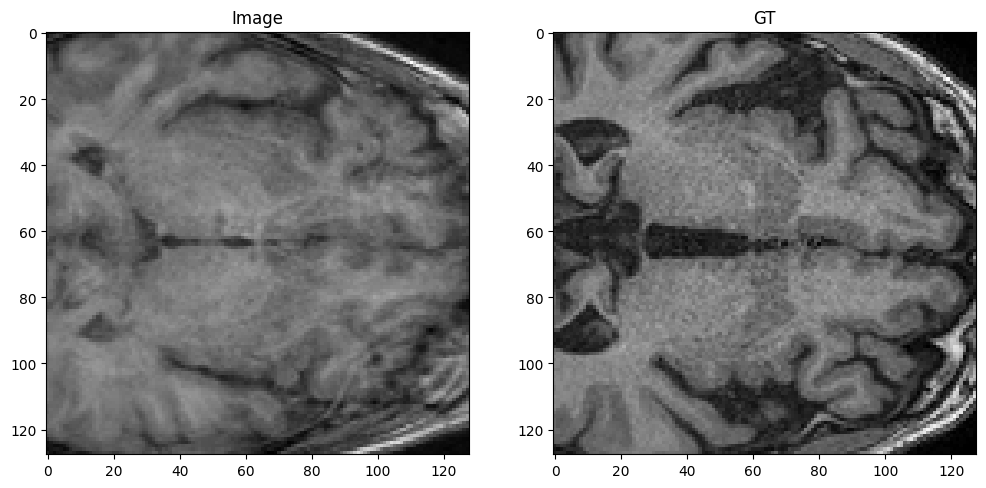

In [10]:
show_image_and_mask(dataset[40])

In [11]:
model = UNet3D()

In [12]:
loader = DataLoader(dataset, 6)

In [13]:
model = model.cuda()

In [14]:
it = next(iter(loader))
model(it[0].cuda())

tensor([[[[[ 1.3364e-01,  7.2139e-02, -3.9048e-01,  ..., -3.6571e-01,
            -9.9125e-01, -5.3504e-01],
           [ 3.7075e-01,  4.3173e-01,  8.1549e-02,  ..., -2.3961e-01,
            -1.0424e-01,  1.0615e+00],
           [ 3.9234e-01,  9.6877e-01,  2.2203e-01,  ..., -5.3938e-01,
            -7.7364e-02,  8.2966e-01],
           ...,
           [ 4.9756e-01,  1.4827e-01, -5.1699e-01,  ..., -8.3662e-01,
             9.3116e-02,  1.8545e-01],
           [ 5.9766e-01,  5.1734e-01,  3.0884e-01,  ...,  1.8959e-01,
             6.4132e-01,  4.7464e-01],
           [ 8.4529e-01,  8.2753e-01,  4.2341e-01,  ...,  3.8998e-01,
             4.7954e-01,  2.5057e-01]],

          [[ 6.0552e-01,  8.9208e-02, -1.7608e-01,  ...,  1.2526e+00,
            -5.1680e-01,  2.1128e-01],
           [ 1.2913e+00,  1.1768e+00,  1.2977e+00,  ...,  1.8043e+00,
             1.5391e+00,  1.1581e+00],
           [ 1.9800e+00,  1.9873e+00,  6.4324e-01,  ...,  1.1833e+00,
             1.0895e+00,  6.5042e-01],
 